# Proyek Prediksi Harga Rumah
- **Nama:** Dzakwan Dawsie
- **Email:** d.dawsie136@gmail.com
- **ID Dicoding:** zack01

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install requests

In [3]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [77]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import regularizers

import tensorflowjs as tfjs

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Another libraries
from geopy.distance import geodesic
import pandas as pd
import seaborn as sns
import zipfile,os, shutil, time
import numpy as np
import glob
import requests
from PIL import Image
from google.colab import files
from io import BytesIO

## Data Preparation

### Data Loading

Mengupload dataset csv melalui form dibawah ini

In [5]:
uploaded = files.upload()
filenames = list(uploaded.keys())
filename = filenames[0]

print(f"Uploaded file: {filename}")

Saving kc_house_data 2.csv to kc_house_data 2.csv
Uploaded file: kc_house_data 2.csv


Membuka dataset menggunakan pandas dan menjadikannya DataFrame

In [6]:
house_df = pd.read_csv(filename)

Cek jumlah baris dan kolom pada DataFrame

*jika csv sesuai, maka jumlah baris dan kolomnya adalah 21.613 baris x 21 kolom*

In [7]:
jumlah_ulasan, jumlah_kolom = house_df.shape

print(f"Jumlah baris: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah baris: 21613
Jumlah kolom: 21


Memastikan isian data dengan menampilkan data 5 baris teratas

In [8]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Preprocessing

#### Data Cleansing

Mengecek apakah ada data yang null

In [9]:
house_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Dari pengecekan diatas, diketahui bahwa terdapat 2 baris data yang null pada kolon `sqft_above`

Maka, selanjutnya baris *null* tersebut akan dibersihkan

In [10]:
clean_house_df = house_df.dropna()
clean_house_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Memastikan data bersih dengan menghapus data yang duplikat

In [11]:
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_house_df.shape

print(f"Jumlah baris sebelum menghapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")

clean_house_df = clean_house_df.drop_duplicates()

jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_house_df.shape

print(f"Jumlah baris setelah menghapus duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")

Jumlah baris sebelum menghapus duplikat: 21611
Jumlah baris setelah menghapus duplikat: 21611


Menghapus kolom yang tidak diperlukan dalam proses training.

Yaitu kolom `id` dan `date`

In [12]:
clean_house_df = clean_house_df.drop('id', axis='columns')
clean_house_df = clean_house_df.drop('date', axis='columns')

#### Data Understanding

Menampilkan persebaran data

<Axes: xlabel='long', ylabel='lat'>

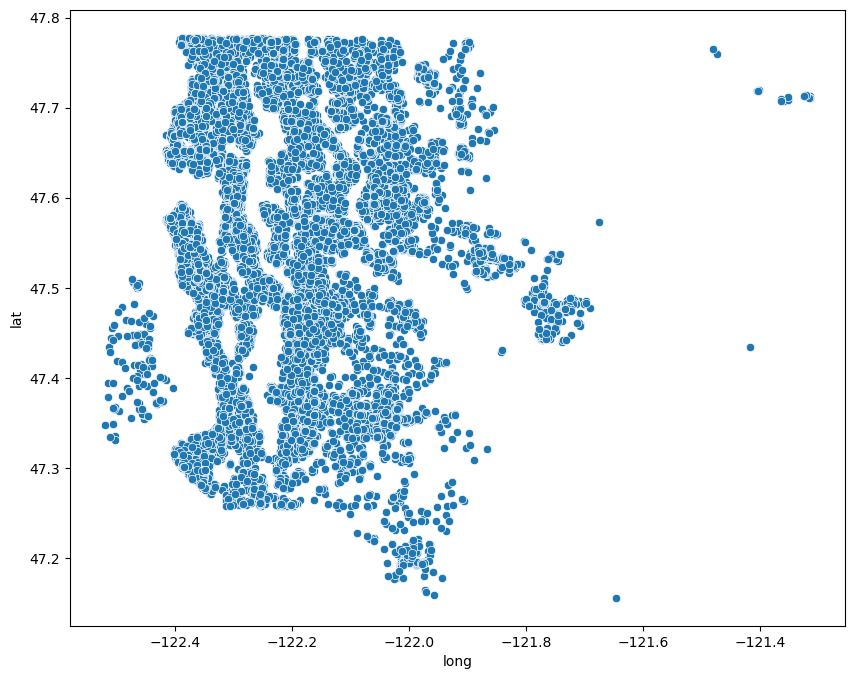

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=clean_house_df, x=clean_house_df['long'], y=clean_house_df['lat'])

Pada scatter plot diatas, diketahui bahwa persebaran data membentuk suatu daerah.

Yaitu pusat kota Seattle, Washington DC, Amerika Serikat

![picture](https://drive.google.com/uc?id=1bt_PJeTJqjqe499ul5RkdLdNpkP4lvoL&authuser=0)

Mengelompokan scatter plot dengan menjadikan harga rumah sebagai hue

(-0.5, 587.5, 562.5, -0.5)

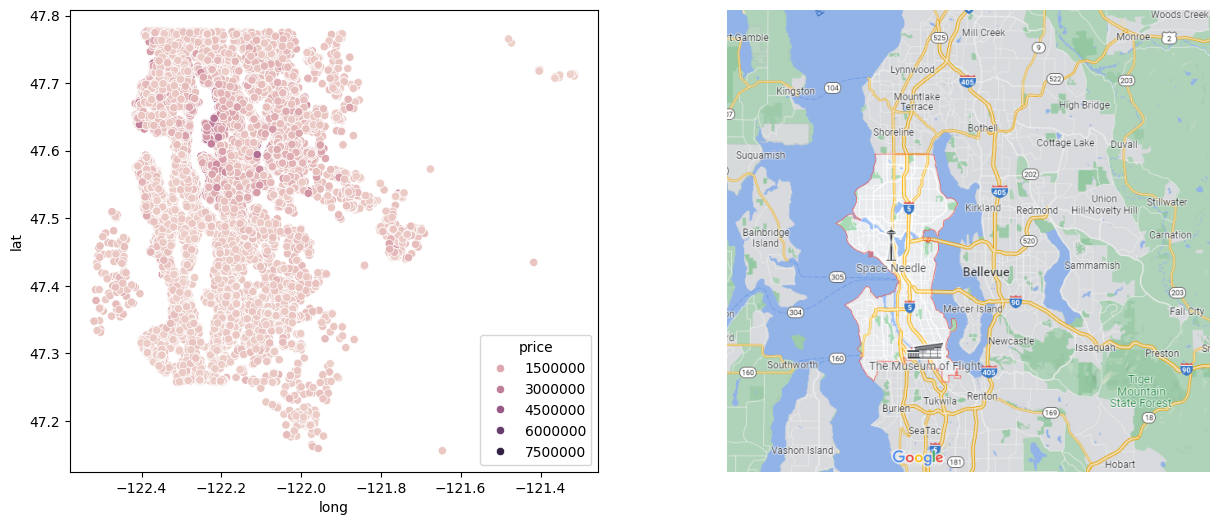

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=clean_house_df, x=clean_house_df['long'], y=clean_house_df['lat'], hue=clean_house_df['price'], ax=ax1)

url = "https://drive.google.com/uc?id=1bt_PJeTJqjqe499ul5RkdLdNpkP4lvoL&authuser=0"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
ax2.axis('off')

Berdasarkan scatter plot diatas. Diketahui bahwa:

> Kebanyakan rumah yang berada di tengah-tengah kota, memiliki harga yang relatif mahal

Itu artinya, jarak rumah antara pusat kota menjadi faktor mahalnya sebuah rumah

Konversi long & lat menjadi `distance` ke pusat kota

In [15]:
center_lat = 47.6062
center_lon = -122.3321

def calculate_distance(lat, lon):
  house_coords = (lat, lon)
  center_coords = (center_lat, center_lon)
  distance = geodesic(house_coords, center_coords).km
  return distance

clean_house_df['distance_to_center'] = clean_house_df.apply(lambda row: calculate_distance(row['lat'], row['long']), axis=1)
clean_house_df = clean_house_df.drop(['long', 'lat'], axis=1)

In [16]:
clean_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21611 non-null  float64
 1   bedrooms            21611 non-null  int64  
 2   bathrooms           21611 non-null  float64
 3   sqft_living         21611 non-null  int64  
 4   sqft_lot            21611 non-null  int64  
 5   floors              21611 non-null  float64
 6   waterfront          21611 non-null  int64  
 7   view                21611 non-null  int64  
 8   condition           21611 non-null  int64  
 9   grade               21611 non-null  int64  
 10  sqft_above          21611 non-null  float64
 11  sqft_basement       21611 non-null  int64  
 12  yr_built            21611 non-null  int64  
 13  yr_renovated        21611 non-null  int64  
 14  zipcode             21611 non-null  int64  
 15  sqft_living15       21611 non-null  int64  
 16  sqft_lot1

#### Data Splitting

Membuat kolom `price` sebagai label dan memisahkannya dari kolom lainnya

In [17]:
X = clean_house_df.drop('price', axis='columns').values
y = clean_house_df['price'].values

Memecah data menjadi `80% train data` dan `20% test data`

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mengaplikasikan MinMaxScaller

In [19]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check for a regression metric like 'loss' or 'val_loss'
    if(logs.get('loss')<0.05 and logs.get('val_loss')<0.05): # Example threshold - adjust as needed.
      print("\nLoss and validation loss have reached <0.05! Training dihentikan.")
      self.model.stop_training = True

callbacks = myCallback()

Membuat model machine learning menggunakan Linear Regression

In [64]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Melatih model

In [69]:
# model.fit(
#     X_train,
#     y_train,
#     epochs=100,
#     verbose=2)

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=375)

Epoch 1/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 23867654144.0000 - val_loss: 21040510976.0000
Epoch 2/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 24458119168.0000 - val_loss: 22833745920.0000
Epoch 3/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 23315013632.0000 - val_loss: 21187905536.0000
Epoch 4/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 23720294400.0000 - val_loss: 21483089920.0000
Epoch 5/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22861541376.0000 - val_loss: 21131853824.0000
Epoch 6/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 24557215744.0000 - val_loss: 21681461248.0000
Epoch 7/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24762767360.0000 - val_loss: 21717448704.0000
Epoch 8/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25126576128.0000 - val_loss: 21338718208.0000
Epoch 9/375
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23476967424.0000 - val_loss: 21359742976.0000
Epoch 10/375
541/541 ━━━━━━━━━━━━━━━━

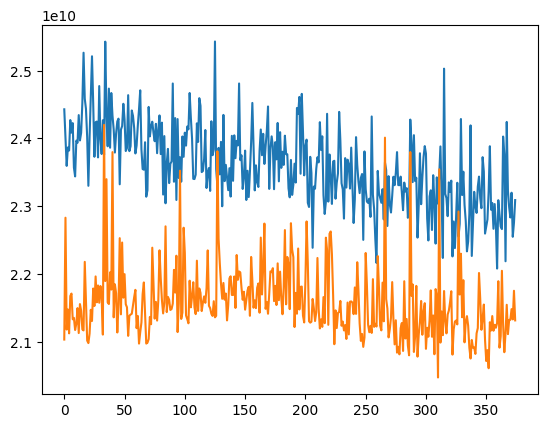

In [70]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses)

### Evaluation

Membuat data test menggunakan data row pertama dari data rumah

In [75]:
test_house = clean_house_df.drop('price', axis='columns').iloc[0]
test_house = scaler.transform(test_house.values.reshape(-1, 17))
test_house

array([[-0.40595143, -1.43609984, -0.97362431, -0.22684004, -0.91359241,
        -0.08602617, -0.30147717, -0.63352982, -0.55423139, -0.73051484,
        -0.65435318, -0.53991264, -0.20845713,  1.86720153, -0.93560757,
        -0.26730284, -0.60754878]])

Prediksi harga dan bandingkan dengan harga asli, dan juga nilai mse

In [88]:
predictions = model.predict(test_house)

predicted_price = predictions[0][0]
actual_price = clean_house_df.iloc[0].price
mse = mean_squared_error([actual_price], [predicted_price])

print(f"Predicted Price: {predicted_price}")
print(f"Actual Price: {actual_price}")
print(f"MSE: {mse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Price: 286982.875
Actual Price: 221900.0
MSE: 4235780618.265625
